In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\PC\advanced_machine_learning-3\AI-ML-Portfolio-Hub\Machine Learning\Supervised Learning\Regression\Datasets\train_energy_data.csv")

In [3]:
data.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


In [5]:
data.describe()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
count,1000.000,1000.000000,1000.000000,1000.000000,1000.000000
mean,25462.388,48.372000,25.606000,22.611390,4166.252570
std,14294.554,29.061972,14.105166,7.139943,933.313064
min,560.000,1.000000,1.000000,10.050000,1683.950000
25%,13169.750,22.000000,13.000000,16.475000,3509.482500
50%,25477.000,47.000000,26.000000,22.815000,4175.730000
75%,37446.250,73.250000,38.000000,28.850000,4863.850000
max,49997.000,99.000000,49.000000,34.990000,6530.600000


In [6]:
data.describe(include='object')

,Building Type,Day of Week
count,1000,1000
unique,3,2
top,Residential,Weekday
freq,347,507


In [7]:
data.isnull().sum()

Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64

In [8]:
data = data.dropna()

In [9]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['Building Type', 'Day of Week']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [10]:
data.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,2,7063,76,10,29.84,0,2713.95
1,0,44372,66,45,16.72,0,5744.99
2,1,19255,37,17,14.30,1,4101.24
3,2,13265,14,41,32.82,0,3009.14
4,0,13375,26,18,11.92,0,3279.17


In [11]:
X = data.drop(columns=['Energy Consumption'])  # Features
y = data['Energy Consumption']  # Target variable

In [12]:
X.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week
0,2,7063,76,10,29.84,0
1,0,44372,66,45,16.72,0
2,1,19255,37,17,14.30,1
3,2,13265,14,41,32.82,0
4,0,13375,26,18,11.92,0


In [13]:
y.head()

0    2713.95
1    5744.99
2    4101.24
3    3009.14
4    3279.17
Name: Energy Consumption, dtype: float64

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [15]:
X

array([[ 1.19680781, -1.28780475,  0.95113382, -1.10695673,  1.0129251 ,
        -0.98609664],
       [-1.22343043,  1.32351621,  0.60686937,  1.37564519, -0.82554417,
        -0.98609664],
       [-0.01331131, -0.43446574, -0.39149753, -0.61043634, -1.16465207,
         1.01409939],
       ...,
       [-1.22343043,  0.98685605,  1.36425116, -0.39764189,  1.34082283,
        -0.98609664],
       [ 1.19680781, -1.1978654 ,  0.64129581,  0.80819332, -0.8591747 ,
         1.01409939],
       [-1.22343043, -0.67537723,  0.29703137, -1.03602524,  1.23152358,
         1.01409939]])

In [16]:
X.shape

(1000, 6)

In [17]:
y.shape

(1000,)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
(X_train.shape, X_test.shape),( y_train.shape, y_test.shape)


(((800, 6), (200, 6)), ((800,), (200,)))

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
linear_model = LinearRegression()

In [22]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = linear_model.predict(X_test)

In [24]:
y_pred

array([4781.81603786, 3065.08602119, 5282.85162202, 5008.23979066,
       4057.43249822, 2669.39353272, 5261.07477705, 3515.51493048,
       5436.84896305, 4487.30243957, 3215.18365168, 4169.96931765,
       5600.01101717, 4123.18239166, 4955.86088741, 3883.69184795,
       2930.87735644, 4625.30449921, 4788.31736307, 5619.19078965,
       4323.50289904, 5270.45415721, 4610.64019479, 3652.84317073,
       2726.1216555 , 3183.46018796, 4047.35649233, 2901.79471471,
       5613.10598292, 5070.76301263, 5053.80527958, 4564.19871239,
       4208.59700053, 5547.20697037, 4239.85660769, 5052.54926453,
       4084.79834574, 4216.99868026, 3729.92005958, 4422.6923437 ,
       3187.41554551, 2956.43559214, 3783.67049439, 5104.78239429,
       5516.92135433, 3751.77352413, 3677.0184766 , 5003.44251694,
       2470.9407566 , 5122.93060202, 4058.43431399, 4820.94623848,
       5351.79347747, 6026.30852763, 4172.44170426, 4498.39249041,
       4775.89966079, 4564.89374934, 2734.78032927, 4753.57273

In [25]:
from sklearn.metrics import r2_score
r2_test = r2_score(y_test, y_pred)

In [26]:
r2_test

0.8451931910305853

In [27]:
r2_train = r2_score(y_train, linear_model.predict(X_train))

In [28]:
r2_train

0.8631990609967539

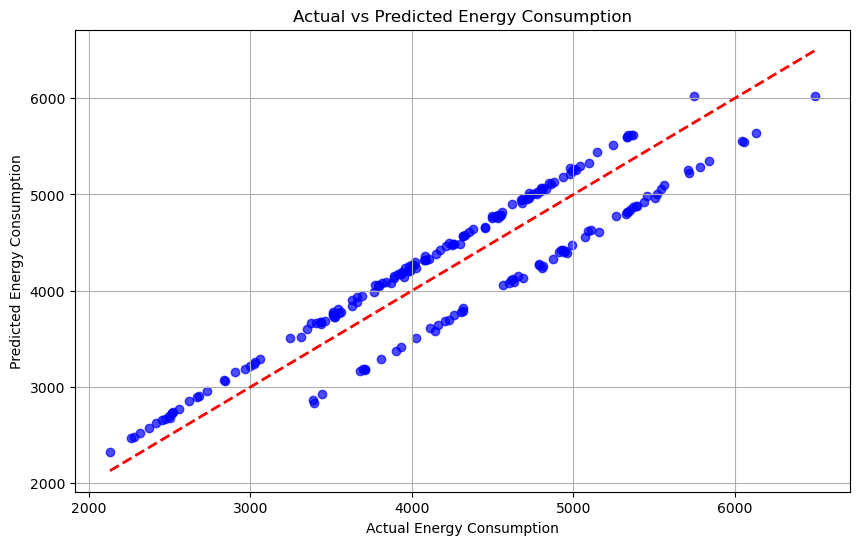

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", linewidth=2)
plt.title("Actual vs Predicted Energy Consumption")
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.grid()
plt.show()

In [30]:
intercept = linear_model.intercept_

# Get the coefficients (theta_1, theta_2, ...)
coefficients = linear_model.coef_

print(f"Intercept (theta_0): {intercept}")
print("Coefficients (theta_1, theta_2, ...):")
for feature, coef in zip(data.drop(columns=['Energy Consumption']).columns, coefficients):
    print(f"  {feature}: {coef}")

Intercept (theta_0): 4165.4483128398515
Coefficients (theta_1, theta_2, ...):
  Building Type: -211.30742402576493
  Square Footage: 714.9274089653334
  Number of Occupants: 308.0642448872679
  Appliances Used: 298.02101259202516
  Average Temperature: -34.05984468053576
  Day of Week: -19.49601764562239


In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [32]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [33]:
y_pred = poly_model.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)
round(r2,2)

0.77

In [34]:
y_pred = poly_model.predict(X_test_poly)
r2 = r2_score(y_train, linear_model.predict(X_train))
round(r2,2)

0.86

# **Advanced Linear Regression**

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, HuberRegressor, TheilSenRegressor, RANSACRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [36]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)

mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression - MAE: {mae_linear:.2f}, MSE: {mse_linear:.2f}, RMSE: {rmse_linear:.2f}, R2: {r2_linear:.2f}")


Linear Regression - MAE: 330.37, MSE: 126059.23, RMSE: 355.05, R2: 0.85


In [37]:
poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression (Degree=3) - MAE: {mae_poly:.2f}, MSE: {mse_poly:.2f}, RMSE: {rmse_poly:.2f}, R2: {r2_poly:.2f}")


Polynomial Regression (Degree=3) - MAE: 0.01, MSE: 0.00, RMSE: 0.01, R2: 1.00


In [38]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression - MAE: {mae_lasso:.2f}, MSE: {mse_lasso:.2f}, RMSE: {rmse_lasso:.2f}, R2: {r2_lasso:.2f}")


Lasso Regression - MAE: 330.36, MSE: 126047.13, RMSE: 355.03, R2: 0.85


In [39]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression - MAE: {mae_ridge:.2f}, MSE: {mse_ridge:.2f}, RMSE: {rmse_ridge:.2f}, R2: {r2_ridge:.2f}")


Ridge Regression - MAE: 330.41, MSE: 126087.85, RMSE: 355.09, R2: 0.85


In [40]:
huber_model = HuberRegressor()
huber_model.fit(X_train_scaled, y_train)
y_pred_huber = huber_model.predict(X_test_scaled)

mae_huber = mean_absolute_error(y_test, y_pred_huber)
mse_huber = mean_squared_error(y_test, y_pred_huber)
rmse_huber = np.sqrt(mse_huber)
r2_huber = r2_score(y_test, y_pred_huber)

print(f"Huber Regression - MAE: {mae_huber:.2f}, MSE: {mse_huber:.2f}, RMSE: {rmse_huber:.2f}, R2: {r2_huber:.2f}")


Huber Regression - MAE: 243.76, MSE: 182804.83, RMSE: 427.56, R2: 0.78


In [41]:
models = {
    "Linear Regression": LinearRegression(),
    "Polynomial Regression": PolynomialFeatures(degree=3),
    "Lasso Regression": Lasso(alpha=0.1),
    "Ridge Regression": Ridge(alpha=1.0),

}

results_train = {}
results_test = {}

for name, model in models.items():
    if name == "Polynomial Regression":
        poly_features = PolynomialFeatures(degree=3)
        X_train_poly = poly_features.fit_transform(X_train_scaled)
        X_test_poly = poly_features.transform(X_test_scaled)
        poly_model = LinearRegression()
        poly_model.fit(X_train_poly, y_train)
        y_pred_train = poly_model.predict(X_train_poly)
        y_pred_test = poly_model.predict(X_test_poly)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred_train = model.predict(X_train_scaled)
        y_pred_test = model.predict(X_test_scaled)

    results_train[name] = {
        "MAE": mean_absolute_error(y_train, y_pred_train),
        "MSE": mean_squared_error(y_train, y_pred_train),
        "RMSE": np.sqrt(mean_squared_error(y_train, y_pred_train)),
        "R2": r2_score(y_train, y_pred_train)
    }

    results_test[name] = {
        "MAE": mean_absolute_error(y_test, y_pred_test),
        "MSE": mean_squared_error(y_test, y_pred_test),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_test)),
        "R2": r2_score(y_test, y_pred_test)
    }


In [42]:
print(f"{'Model':<35} {'Train MAE':<10} {'Test MAE':<10} {'Train MSE':<15} {'Test MSE':<15} {'Train R2':<10} {'Test R2':<10}")
print("=" * 100)

for name in results_train.keys():
    train_metrics = results_train[name]
    test_metrics = results_test[name]

    print(f"{name:<35} {train_metrics['MAE']:<10.2f} {test_metrics['MAE']:<10.2f} "
          f"{train_metrics['MSE']:<15.2f} {test_metrics['MSE']:<15.2f} "
          f"{train_metrics['R2']:<10.2f} {test_metrics['R2']:<10.2f}")


Model                               Train MAE  Test MAE   Train MSE       Test MSE        Train R2   Test R2   
Linear Regression                   321.94     330.37     120727.42       126059.23       0.86       0.85      
Polynomial Regression               0.01       0.01       0.00            0.00            1.00       1.00      
Lasso Regression                    321.95     330.36     120727.47       126047.13       0.86       0.85      
Ridge Regression                    321.98     330.41     120728.57       126087.85       0.86       0.85      
